In [71]:
import pandas as pd
import numpy as np

#### which machine learning models are sensitive to outlier? (Focus on maths behind the models)
1. Naive Bayes classifier ---       Not sensitive to outlier
2. SVM ---  (see the maths part)    Not sensitive
3. Linear Regression ---            Sensitive to outliers
4. Logisitic regression ---         Sensitive to outliers
5. Decision tree regressor or classifier --- Not sensitive
6. Ensemble (random forest, XGBoost, GradientBoosting(GB) ---  Not sensitive (internally they use decision tree)
7. KNN ---                               Not Sensitive
8. KMeans (Unsupervised) ---             Sensitive
9. Heirarchial (Unsupervised) ---        Sensitive 
10. PCA ---                              Absolutely Sensitive
11. Neural networks ---                  Sensitive

- All the unsupervised techniques are sensitive to outliers

In [72]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df['Age'].isnull().sum()


177

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


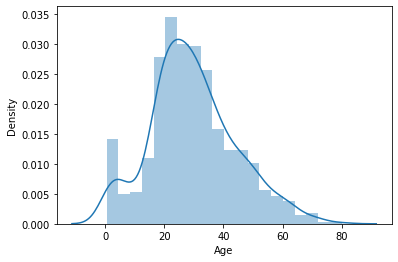

In [74]:
import seaborn as sns
sns.distplot(df['Age'].dropna())
## looks like normal distribn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


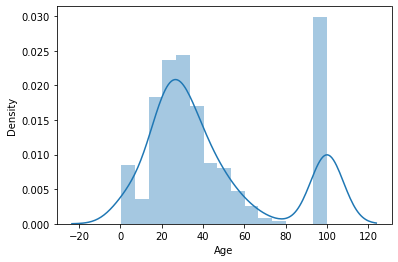

In [75]:
## we create outliers
import seaborn as sns
sns.distplot(df['Age'].fillna(100))

### Gaussian distribution

Text(0, 0.5, 'Np. of passengers')

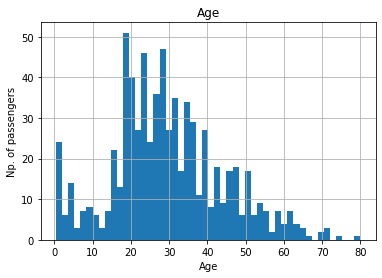

In [76]:
figure= df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('Np. of passengers')

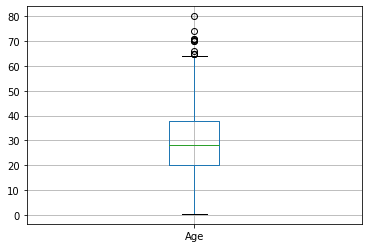

In [77]:
## when data is distributed in gaussian distribution, there's a different way to remove the outliers
#figure =  df.boxplot('Age') this also works
figure= df.boxplot(column='Age')
## the dotted points are the outliers

In [78]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [79]:
### assuming age follows a gaussian distribution 
## we will calculate the boundaries which differentiates the outliers
## in this case we consider mean +- 3 * std to be our required set and others as outliers

## incase of gaussian distribution USE THIS , IMPORTANT, consider rest as outliers
upper_boundary = df['Age'].mean()+ 3* df['Age'].std()

lower_boundary = df['Age'].mean()- 3* df['Age'].std()
print(upper_boundary), print(lower_boundary), print(df['Age'].mean())

## dont require the next few columns, until FARE column

73.27860964406095
-13.88037434994331
29.69911764705882


(None, None, None)

In [80]:
## lets compute the Inter quantile range (IQR)
## IQR = 75th percentile - 25th percentile
IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
IQR

17.875

In [81]:
lower_bridge=df['Age'].quantile(0.25) - (IQR*1.5)
upper_bridge=df['Age'].quantile(0.75)+ (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [82]:
## extereme outliers
ext_lower_bridge=df['Age'].quantile(0.25) - (IQR*3)
ext_upper_bridge=df['Age'].quantile(0.75)+ (IQR*3)
print(ext_lower_bridge), print(ext_upper_bridge)

-33.5
91.625


(None, None)

In [83]:
## we can take upper_bridge and lower_bridge considering maximum value seen above in .decribe()


#### Feature is skewed

Text(0, 0.5, 'N0. of passengers')

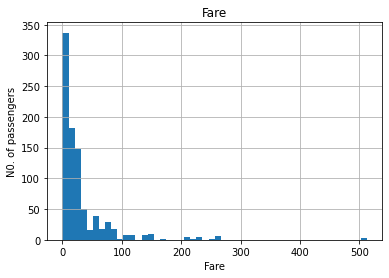

In [84]:
figure= df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('N0. of passengers')

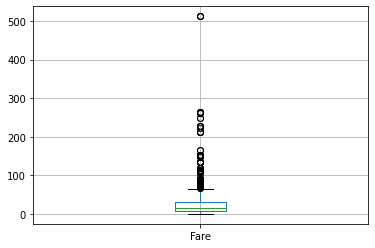

In [85]:
figure= df.boxplot(column='Fare')
##huge amount of outliers

In [86]:
df['Fare'].describe()
##one can see that the diff between max and 75 percentile is huge

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [87]:
## how to calc upper and lower boundaries in this case when data is skewed
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [88]:
lower_bridge=df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+ (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [89]:
ext_lower_bridge=df['Fare'].quantile(0.25) - (IQR*3)
ext_upper_bridge=df['Fare'].quantile(0.75)+ (IQR*3)
print(ext_lower_bridge), print(ext_upper_bridge)
## when data is skwewed and highest value is 500, we can consider this
## fare cannot be negative

-61.358399999999996
100.2688


(None, None)

### Removing the outliers in the data

In [90]:
data = df.copy()

In [91]:
data.loc[data['Age']>=73,'Age']=73

## if the age is greater than 73 , wrt the Age column/feature, we replace it with 73

In [92]:
data.loc[data['Fare']>=100,'Fare']=100 

Text(0, 0.5, 'N0. of passengers')

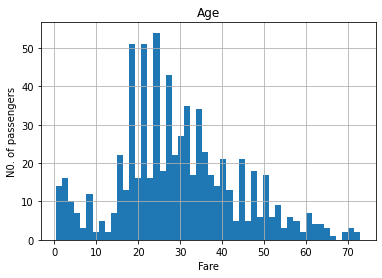

In [93]:
figure= data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Fare')
figure.set_ylabel('N0. of passengers')
### now you see that max value is 100

Text(0, 0.5, 'N0. of passengers')

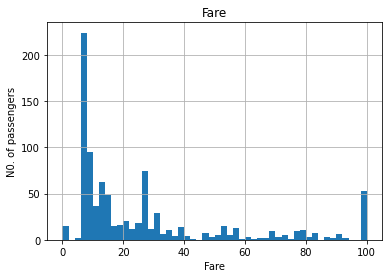

In [94]:
figure= data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('N0. of passengers')
### now you see that max value is 100

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'], test_size=0.3)

In [96]:
## Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test) 

from sklearn.metrics import accuracy_score, roc_auc_score
print("accuracy score:{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc score:{}".format(roc_auc_score(y_test,y_pred1[:,1]))) 

## didnt understand the last line pred1?

accuracy score:0.6902985074626866
roc_auc score:0.6883380739536773


In [97]:
##RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test) 

from sklearn.metrics import accuracy_score, roc_auc_score
print("accuracy score:{}".format(accuracy_score(y_test,y_pred)))
print("roc_auc score:{}".format(roc_auc_score(y_test,y_pred1[:,1])))


## we can increase the accuracy by hyper-parameter tuning

accuracy score:0.6604477611940298
roc_auc score:0.7078133163057991
